## Principal Components Analysis using R

In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "3"

$minor
[1] "4.4"

$year
[1] "2018"

$month
[1] "03"

$day
[1] "15"

$`svn rev`
[1] "74408"

$language
[1] "R"

$version.string
[1] "R version 3.4.4 (2018-03-15)"

$nickname
[1] "Someone to Lean On"

In [2]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Loading required package: devtools
Skipping install of 'factoextra' from a github remote, the SHA1 (1012e1b5) has not changed since last install.
  Use `force = TRUE` to force installation


In [3]:
install.packages("FactoMineR")
install.packages("tidyverse")

Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
library(factoextra)
library(FactoMineR)
library(tidyverse)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.3.0
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
# Load the data
data <- read.table("Caracteristicas_Calidad_del_Agua_SIVICAP_Santander.csv",header=TRUE,sep=",")
data

Municipalities,Samples,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA,Level
Aguada,9,0.9055556,0.33666667,7.408889,1.2142857,46.000000,18.611111,12.601111,72.43333,17.911667,0.10000000,8.202222,0.010571429,905.0000000,300.0000000,9.874444,BAJO
Albania,7,0.7142857,0.23571429,7.500000,1.0000000,78.214286,25.742857,31.151429,154.68571,69.870000,0.05000000,5.165714,0.026200000,1292.8571429,1410.0000000,32.004285,MEDIO
Aratoca,9,1.8888889,0.42777778,7.265556,0.3857143,23.722222,6.100000,5.176667,27.66667,6.386667,0.09714286,4.178750,0.020571428,963.3750000,75.2500000,31.928888,MEDIO
Barbosa,9,0.3722222,0.96111111,7.702222,1.5566667,52.700000,35.611111,21.145556,123.71667,62.070000,0.12142857,10.981111,0.013200000,1396.3333333,85.1111111,30.994444,MEDIO
Barichara,11,0.3190000,0.69000000,7.327273,1.2000000,7.300000,3.550000,3.742222,21.79000,30.957143,0.11571429,7.495000,0.014625000,4.7000000,0.0000000,4.380000,SIN RIESGO
Barrancabermeja,40,2.4118116,0.76224638,7.085714,1.1388571,13.319203,10.491898,8.363406,45.78080,24.553482,0.30157895,10.277810,0.013938144,17.4637681,0.7737226,2.332142,SIN RIESGO
Betulia,11,4.2627273,0.62909091,6.072727,1.3055556,3.636364,3.936364,4.364545,22.12727,18.257500,0.06666667,6.446364,0.022666667,5.3000000,0.1000000,7.500909,BAJO
Bolívar,8,0.3950000,0.71000000,7.600000,0.9750000,133.562500,24.512500,24.838750,138.35000,28.862000,0.05333333,9.740000,0.020666667,3.2857143,0.0000000,4.807500,SIN RIESGO
Bucaramanga,41,0.3727273,0.25690909,7.387411,0.9634286,43.147727,20.740955,11.082727,71.47545,42.395882,0.01975000,7.698000,0.019358289,3.2130435,0.5304348,2.329419,SIN RIESGO
Cabrera,11,3.4545455,1.43272727,7.372727,0.7090909,35.181818,12.436364,10.039091,54.29455,15.575000,0.08555556,7.370000,0.017125000,0.3333333,0.0000000,7.025454,BAJO


In [6]:
data_n <- data %>% select(3:16)

In [7]:
data_n

Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli
0.9055556,0.33666667,7.408889,1.2142857,46.000000,18.611111,12.601111,72.43333,17.911667,0.10000000,8.202222,0.010571429,905.0000000,300.0000000
0.7142857,0.23571429,7.500000,1.0000000,78.214286,25.742857,31.151429,154.68571,69.870000,0.05000000,5.165714,0.026200000,1292.8571429,1410.0000000
1.8888889,0.42777778,7.265556,0.3857143,23.722222,6.100000,5.176667,27.66667,6.386667,0.09714286,4.178750,0.020571428,963.3750000,75.2500000
0.3722222,0.96111111,7.702222,1.5566667,52.700000,35.611111,21.145556,123.71667,62.070000,0.12142857,10.981111,0.013200000,1396.3333333,85.1111111
0.3190000,0.69000000,7.327273,1.2000000,7.300000,3.550000,3.742222,21.79000,30.957143,0.11571429,7.495000,0.014625000,4.7000000,0.0000000
2.4118116,0.76224638,7.085714,1.1388571,13.319203,10.491898,8.363406,45.78080,24.553482,0.30157895,10.277810,0.013938144,17.4637681,0.7737226
4.2627273,0.62909091,6.072727,1.3055556,3.636364,3.936364,4.364545,22.12727,18.257500,0.06666667,6.446364,0.022666667,5.3000000,0.1000000
0.3950000,0.71000000,7.600000,0.9750000,133.562500,24.512500,24.838750,138.35000,28.862000,0.05333333,9.740000,0.020666667,3.2857143,0.0000000
0.3727273,0.25690909,7.387411,0.9634286,43.147727,20.740955,11.082727,71.47545,42.395882,0.01975000,7.698000,0.019358289,3.2130435,0.5304348
3.4545455,1.43272727,7.372727,0.7090909,35.181818,12.436364,10.039091,54.29455,15.575000,0.08555556,7.370000,0.017125000,0.3333333,0.0000000


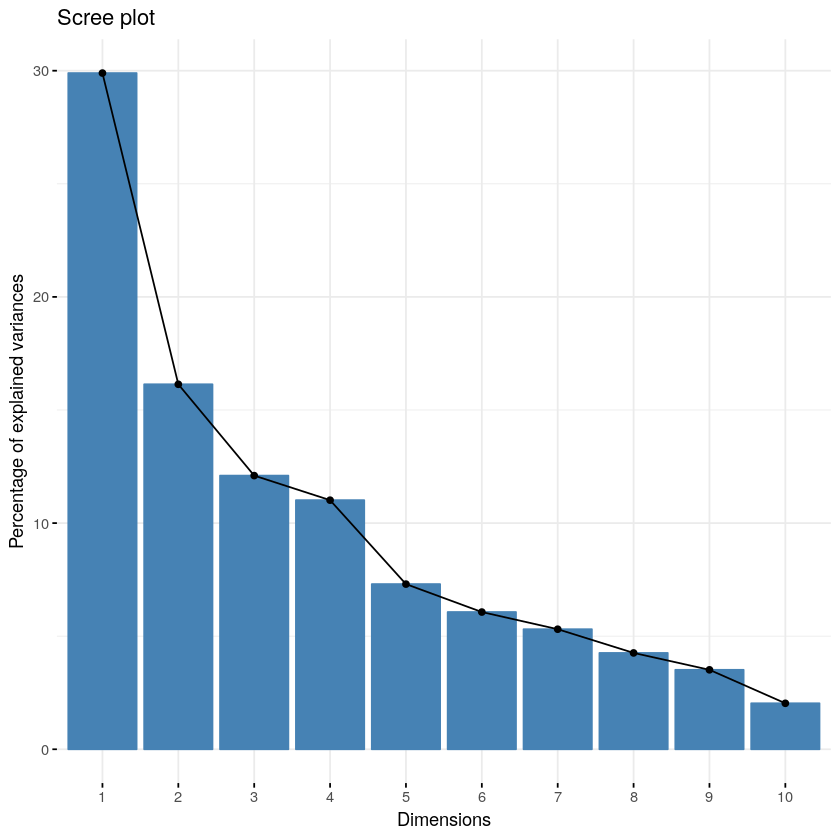

In [11]:
# Compute principal component analysis
library(FactoMineR)
res.pca <- PCA(data_n, ncp = 3, graph=FALSE)
# Percentage of information retained by each
# dimensions
library(factoextra)
fviz_eig(res.pca)

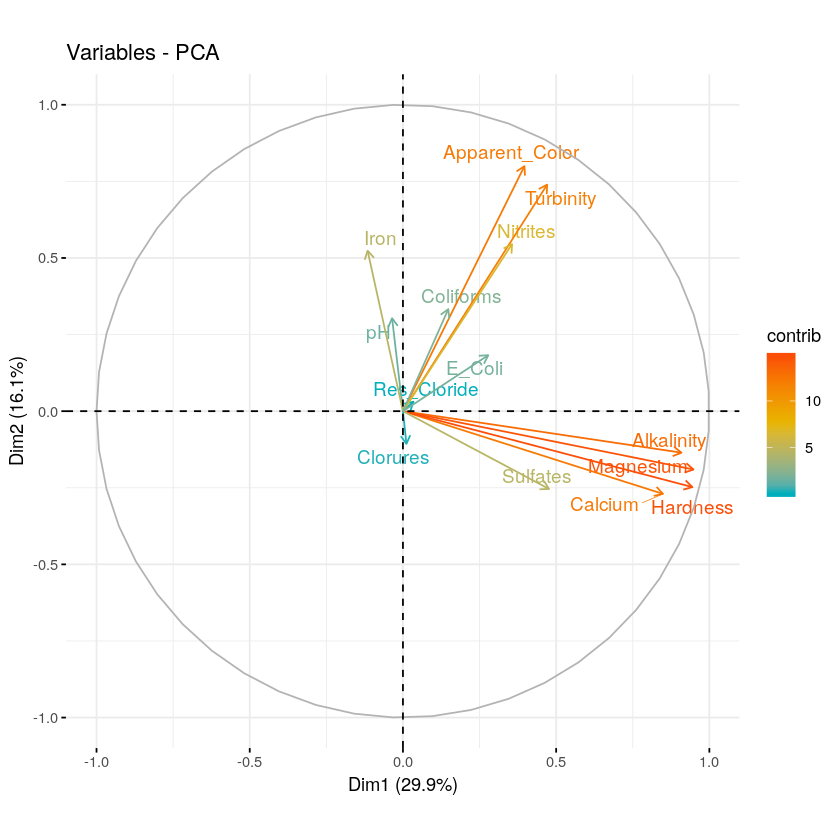

In [25]:
# Visualize variables
fviz_pca_var(res.pca,col.var = "contrib",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = TRUE)

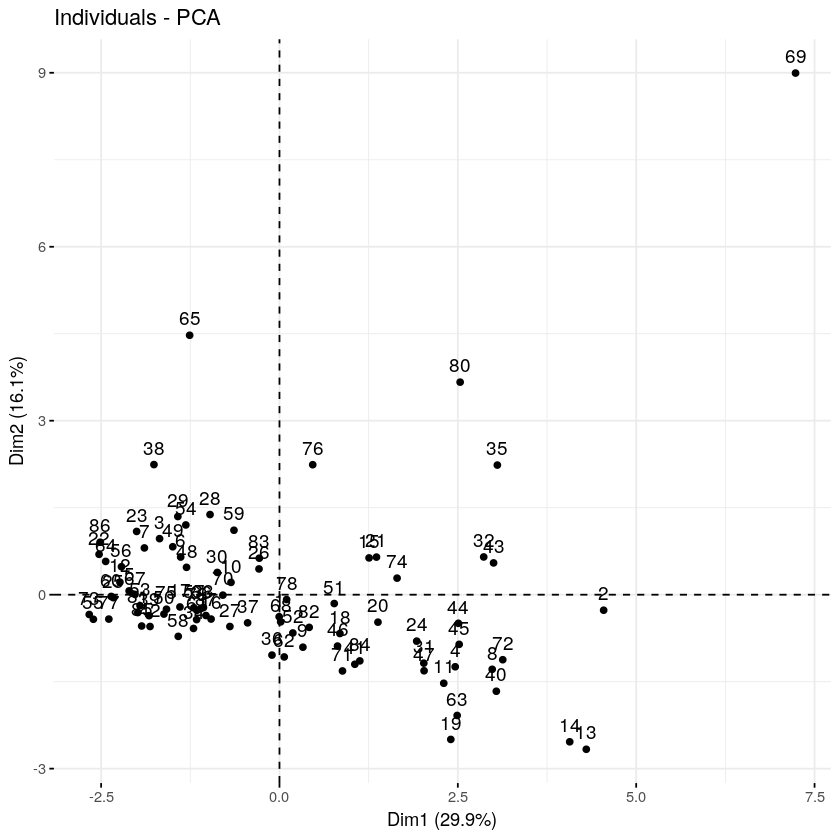

In [43]:
# Visualize individuals
fviz_pca_ind(res.pca,palette = c("#00AFBB",  "#FC4E07"))

In [28]:
get_eig(res.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.18524577,29.8946127,29.89461
Dim.2,2.25891235,16.1350882,46.02970
Dim.3,1.69382365,12.0987404,58.12844
Dim.4,1.54173753,11.0124110,69.14085
Dim.5,1.02219730,7.3014093,76.44226
Dim.6,0.84931344,6.0665245,82.50879
Dim.7,0.74304805,5.3074861,87.81627
Dim.8,0.59630038,4.2592884,92.07556
Dim.9,0.49174126,3.5124376,95.58800
Dim.10,0.28456077,2.0325769,97.62058


In [31]:
# Compute PCA with ncp = 3
res.pca <- PCA(data_n, ncp = 3, graph = FALSE)
# Compute HCPC
res.hcpc <- HCPC(res.pca, graph = FALSE)

In [32]:
# Data with cluster assignements
head(res.hcpc$data_n.clust, 10)

NULL

In [33]:
# Variable describing clusters
res.hcpc$desc.var


Link between the cluster variable and the quantitative variables
                    Eta2      P-value
Calcium        0.6887397 5.142797e-22
Hardness       0.6867935 6.681804e-22
Magnesium      0.6827651 1.142879e-21
Alkalinity     0.6414795 1.947998e-19
E_Coli         0.5581551 1.262801e-15
Apparent_Color 0.3282154 5.541933e-08
Turbinity      0.3241666 7.132887e-08
Nitrites       0.2323586 1.501936e-05
Coliforms      0.2090202 5.283800e-05
Sulfates       0.1741865 3.228816e-04
Res_Cloride    0.1423679 1.579951e-03

Description of each cluster by quantitative variables
$`1`
              v.test Mean in category Overall mean sd in category Overall sd
E_Coli     -1.972872       18.9869244    58.828975     57.0557923 228.275647
Turbinity  -2.346594        0.9846402     1.714198      0.9967099   3.514300
Sulfates   -3.870287       22.2796311    27.590601     11.8804558  15.511277
Alkalinity -7.426446       23.8424463    46.146060     14.9766944  33.947754
Calcium    -7.624339        8.858

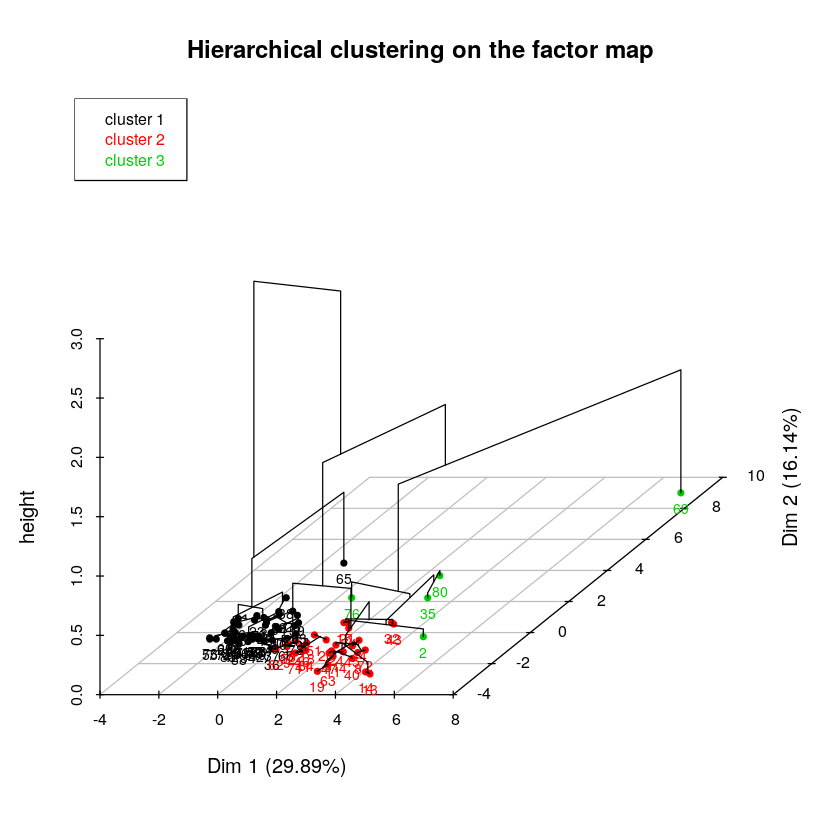

In [34]:
# Principal components + tree
plot(res.hcpc, choice = "3D.map")

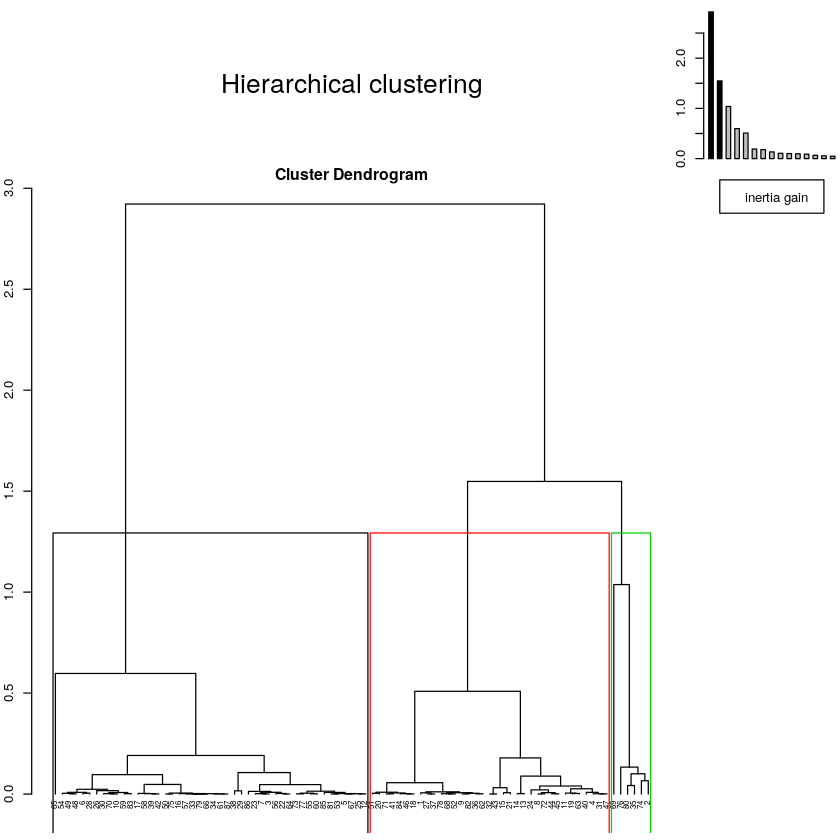

In [35]:
# Plot the dendrogram only
plot(res.hcpc, choice ="tree", cex = 0.6)

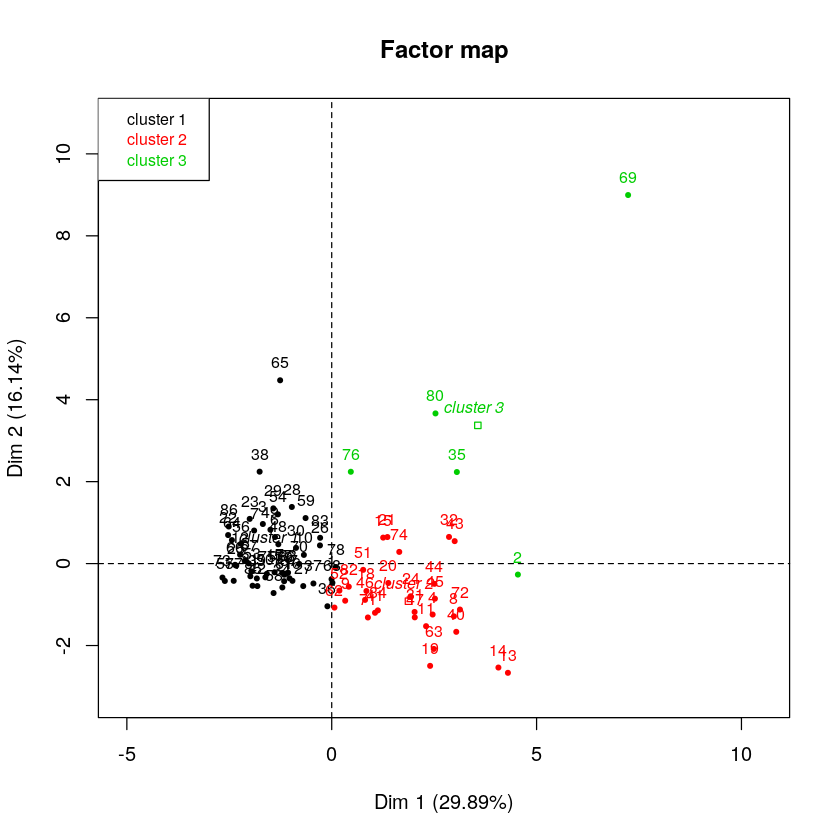

In [41]:
# Draw only the factor map
plot(res.hcpc, choice ="map", draw.tree = FALSE)

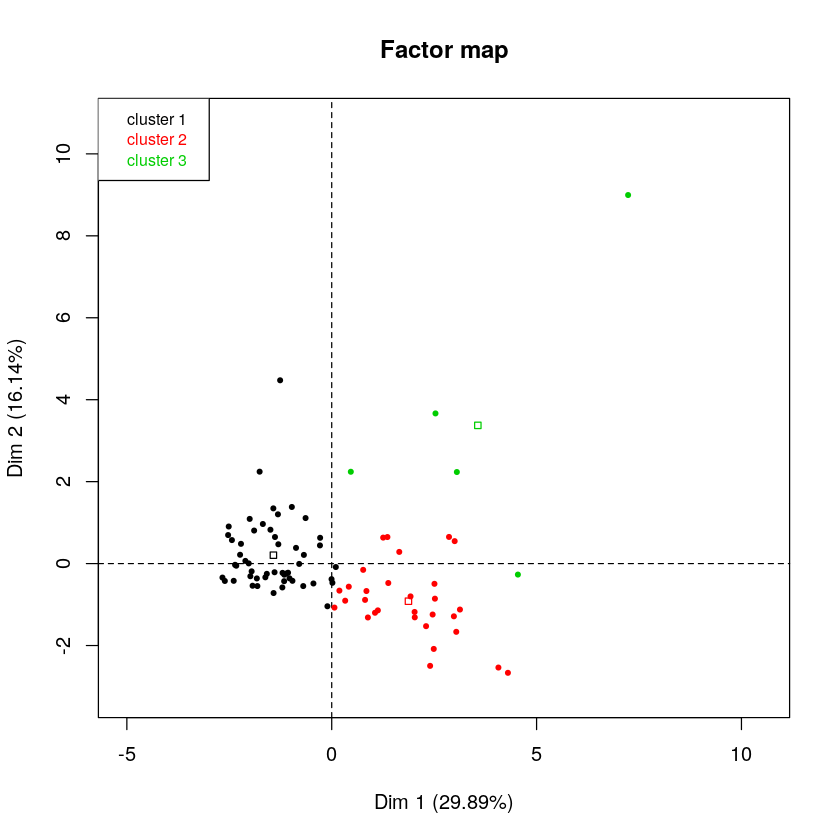

In [37]:
# Remove labels and add cluster centers
plot(res.hcpc, choice ="map", draw.tree = FALSE,
     ind.names = FALSE, centers.plot = TRUE)

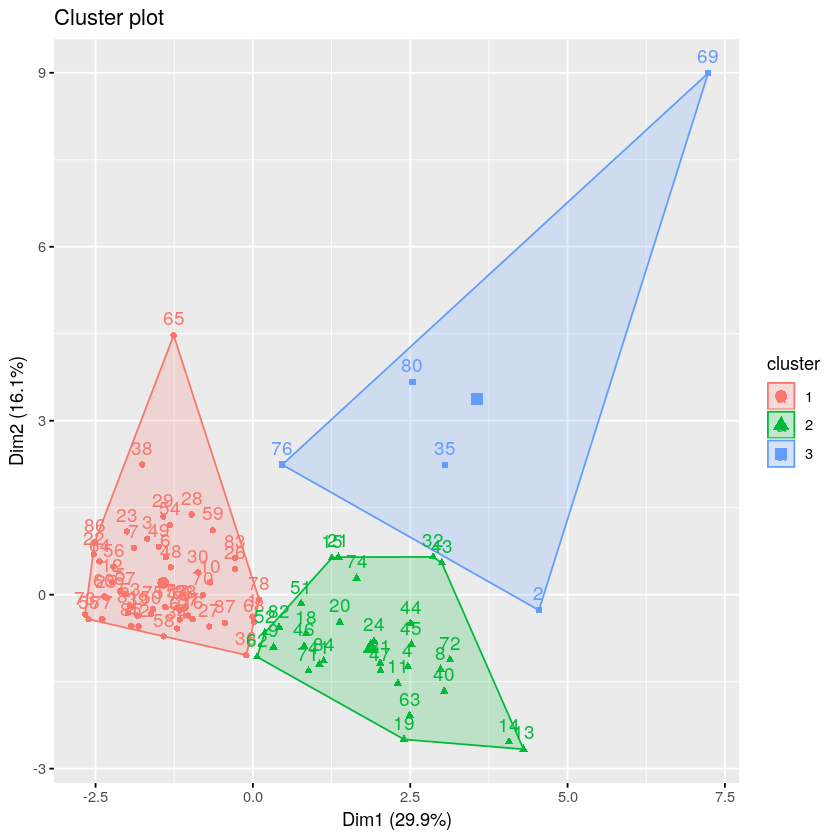

In [38]:
fviz_cluster(res.hcpc)

In [39]:
t.test(data_n[,14],conf.level = 0.99,mu=58.82)


	One Sample t-test

data:  data_n[, 14]
t = 0.00036462, df = 86, p-value = 0.9997
alternative hypothesis: true mean is not equal to 58.82
99 percent confidence interval:
  -6.013731 123.671682
sample estimates:
mean of x 
 58.82898 


In [24]:
help(t.test)